# Kaizen API instructions and examples
***


*This is intended to be a reference document for the BPRC team working within Carleton University. This documents shows several examples API calls and work flows. Excerpts from Coppertree's documentation are included, along with a working python implementations.
<br/><br/>
To get supplementary files including Kaizen API login information and runnable examples, contact Connor Brackley (connor.brackley@mail.concordia.ca)*

**UPDATE**: Since the initial release of this document, Kaizen has updated their API. The relevant updates are now included in this reference document.

### **Table of Contents:**
- [Reference doucments](#Reference-doucments) <br>
- [Notebook setup](#Notebook-setup) <br>
- [Public Trend Log API](#Public-Trend-Log-API) <br>
- [Batch Download Public Trend Log API](#Batch-Download-Public-Trend-Log-API) <br>
- [Access to other API's via the JWT Token](#Access-to-other-API's-via-the-JWT-Token) <br>
- [Get list of trend logs](#Get-list-of-trend-logs) <br>
- [Get List of Systems and Subordinates](#Get-List-of-Systems-and-Subordinates) <br>
- [Example Workflows](#Example-Workflows) <br> 
 - [Workflow 1](#Workflow-1) <br>
 - [Workflow 2](#Workflow-2) <br>

# Reference doucments
****
Documents referenced to construct this document
<br/><br/>
1: [KbA0045: API to Pull Data From Kaizen](https://support.coppertreeanalytics.com/knowledge-base/kba/knowledge-base-articles/kba0045-api-to-pull-data-from-kaizen/)
<br/>
2: [Kaizen Database Upgrades](https://support.coppertreeanalytics.com/news-and-announcements/)

# Notebook setup
***

### Import packages

In [2]:
# Imports from standard libraries
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Import API puller from supplementary file
from API_puller import API_puller

### Supplementary functions

In [3]:
def check_response(r):
    '''Checks to ensure the expected response is received
    
    The accepted response from the API from the API is response [200] this
    function outputs raises an error if any other response is received.
    '''
    if r.status_code == 200:
        return None
    else:
        raise ImportError('Received: [{}], Expected: [<Response [200]>]'.format(r))

In [4]:
def print_n_lines(json_var, n_lines=20, indent=2):
    '''Pretty prints n lines of json file.
    
    This is used to make the outputs more compact
    '''
    pretty_str = str(json.dumps(json_var, indent=indent))
    length = len(pretty_str.splitlines())
    
    print('First {} / {} lines of json file:\n'.format(n_lines, length))
    for line in pretty_str.splitlines()[:n_lines]:
        print(line)
    print('..............')

### Load supplementary files

This step depends on a text file with the the required login information. It have been intentionally not been uploaded to GitHub - if you require this file contact Connor Brackley (connor.brackley@mail.concordia.ca)

In [5]:
# Load text file
with open('login_info_v1.txt') as f:
    login_info = json.loads(f.read())

# Assign variables
api_key = login_info['api_key']
client_id = login_info['api_key'] # The client ID is the same as the API key
client_secret = login_info['client_secret']
print('Login info successfully downloaded')

Login info successfully downloaded


# Public Trend Log API
***

Excerpt from Kaizen Documentation:
><h3 id="To_get_trend_data:"> To get trend data: </h3>
><pre>https://kaizen.coppertreeanalytics.com/public_api/api/get_tl_data_start_end?api_key=&lt;api_key&gt;&amp;tl=&lt;tl_ref&gt;&amp;start=&lt;start_date&gt;&amp;end=&lt;end_date&gt;&amp;format=json&amp;data=&lt;raw or align&gt;
></pre>
>where: <ul>
><li> <strong>api_key</strong> is the user's Kaizen Key. Your API key can be found on the User Profile page.
></li> <li> <strong>tl_ref</strong> is the full reference for the trend log, in the format <building_id>.<device_id>.TL<instance_id> <ul>
><li> Example: 123.TL45 from the following building: <a class="natExternalLink" href="https://kaizen.coppertreeanalytics.com/v3/#/clients/551/buildings/2914" target="_blank" rel="noopener noreferrer">https://kaizen.coppertreeanalytics.com/v3/#/clients/551/buildings/2914</a> would be 2914.123.TL45. This will also be displayed in the URL when viewing this TL in the Vault.
></li></ul>
></instance_id></device_id></building_id></li> <li> <strong>start_date</strong> and <strong>end_date</strong> is the desired period start/end dates in the format YYYY-MM-DDThh:mm:ss e.g. 2018-01-01T00:00:00
></li> <li> <strong>&amp;data</strong> will determine if data's timestamps should be normalized or left in raw format <ul>
><li> <strong>raw</strong> will give the time-stamps and data exactly as they are read from the BAS
></li> <li> <strong>align</strong> will normalize the time-stamps to be aligned to 5-minute intervals. This must be defined to replicate the behavior of the BP API for point data.
></li></ul>
></li></ul>
><p></p>
><h4 id="Curl_Example:"> Curl Example: </h4>
><pre>curl “https://kaizen.coppertreeanalytics.com/public_api/api/get_tl_data_start_end?api_key=&lt;api_key&gt;&amp;tl=&lt;tl_ref&gt;&amp;start=&lt;start_date&gt;&amp;end=&lt;end_date&gt;&amp;format=json&amp;data=raw”
></pre>
><p></p>

### Python Implamentation:

In [6]:
# Example inputs
tl_ref = '5606.490407.TL9' # ID tags
start_date = '2021-01-01T00:00:00' # Start date and time
end_date = '2022-01-01T00:00:00' # End date and time (Non Inclusive)

# Optional Inputs
format_output = 'json'
data_normalize = 'raw'

# Generate URL
url = 'https://kaizen.coppertreeanalytics.com/public_api/api/get_tl_data_start_end?' \
      'api_key={}&tl={}&start={}&end={}&format={}&data={}'.format(
            api_key, tl_ref, start_date, end_date, format_output, data_normalize)

# Download data from public API
r = requests.get(url)
check_response(r)

#Print first 20 calls
r.json()[:20]

[{'ts': '2021-01-01T00:00:00', 'v': 23.37266540527344},
 {'ts': '2021-01-01T00:05:00', 'v': 23.31012725830078},
 {'ts': '2021-01-01T00:10:00', 'v': 23.3101273},
 {'ts': '2021-01-01T00:15:00', 'v': 23.3101273},
 {'ts': '2021-01-01T00:20:00', 'v': 23.3726654},
 {'ts': '2021-01-01T00:25:00', 'v': 23.3726654},
 {'ts': '2021-01-01T00:30:00', 'v': 23.3101273},
 {'ts': '2021-01-01T00:35:00', 'v': 23.3101273},
 {'ts': '2021-01-01T00:40:00', 'v': 23.2475891},
 {'ts': '2021-01-01T00:45:00', 'v': 23.1850433},
 {'ts': '2021-01-01T00:50:00', 'v': 23.1850433},
 {'ts': '2021-01-01T00:55:00', 'v': 23.2475891},
 {'ts': '2021-01-01T01:00:00', 'v': 23.2475891},
 {'ts': '2021-01-01T01:05:00', 'v': 23.2475891},
 {'ts': '2021-01-01T01:10:00', 'v': 23.1850433},
 {'ts': '2021-01-01T01:15:00', 'v': 23.1225128},
 {'ts': '2021-01-01T01:20:00', 'v': 23.1850433},
 {'ts': '2021-01-01T01:25:00', 'v': 23.2475891},
 {'ts': '2021-01-01T01:30:00', 'v': 23.3101273},
 {'ts': '2021-01-01T01:35:00', 'v': 23.2475891}]

# Batch Download Public Trend Log API
***

Currently there is not built in method to batch load trend logs, however the function included here takes advantage of the public trend log API to download and organize a list of trend logs.

**API_puller documentation:**

    Retrieves data from Coppertree Analytics Kaizen API and organizes it into a single dataframe

    This function utilizes multithreading for to increase speed of API processing

    Parameters
    ----------
    trend_log_list : Pandas Dataframe
        a two column pandas dataframe with the trend log controller number in the in the first column
        and the name of the trend log in the second column

    API_key: str
         Your api key, which can be accessed through you're Kaizen account

    date_range: list, Format: ['YYYY-MM-DD', 'YYYY-MM-DD']
          a list of two date strings indicating start date and end date.
          Note: The date range is non inclusive, so the "end date" is not included in the API call

    resample: int, optional (default = none)
        Resample dataframe in minutes. For example to resample every 1 hour, enter resample=60. Fill method
        is based on previous within the resample timeframe. If there is no samples, NaN is returned
        If none is received, no resampling will occur (warning: this may result in large outputs if
        event based sensors are included in query)

    Returns
    -------
    Dataframe
        Dataframe of the requested sensor inputs

### Python Implamentation:

In [8]:
# Example inputs
trend_logs = ['5606.490405.TL9', '5606.490405.TL1', '5606.490405.TL11'] # ID tags
labels = ['HS_RM3301_RMT_TL', 'HS_RM3301_LUX1_TL', 'HS_RM3301_CO2_TL'] # labels

# Convert trend log lists into dataframe
trend_log_list = pd.DataFrame(list(zip(trend_logs, labels)), columns =['_id', 'object_name'])

# Employ API puller
df = API_puller(
    trend_log_list=trend_log_list,
    API_key=api_key,
    date_range=['2019-01-01', '2020-01-01'],
    resample=60
)

# Output resulting dataframe
df

Organizing: 100%|██████████| 3/3 [00:00<00:00, 748.72it/s]


,HS_RM3301_RMT_TL,HS_RM3301_LUX1_TL,HS_RM3301_CO2_TL
ts,,,
2019-01-01 00:00:00,22.684723,0.0,416.605621
2019-01-01 01:00:00,22.559654,0.0,415.628815
2019-01-01 02:00:00,22.434570,0.0,410.744812
2019-01-01 03:00:00,22.309486,0.0,421.978058
2019-01-01 04:00:00,22.246964,0.0,421.001251
...,...,...,...
2019-12-31 19:00:00,21.308861,0.0,416.605621
2019-12-31 20:00:00,21.183777,0.0,400.976807
2019-12-31 21:00:00,20.996162,0.0,411.721619


# Access to other API's via the JWT Token
***

***Before accessing the other APIs, you need to get a JWT token. This acts as an added layer of security***

Excerpt from Kaizen Documentation:
><h2 id="Get_JWT_Token"> Get JWT Token </h2>
><p></p>
>First, the identity of the user must be confirmed to ensure that site data is going into the right hands. This is done through the production of an Auth0 JWT token.
><p></p>
>Reach out to <a href="mailto:customersolutions@coppertreeanalytics.com">customersolutions@coppertreeanalytics.com</a> and mention that you would like to work with the Insights API. You will receive a Client_ID and Client_Secret; use these parameters with the following cURL command to produce the token:
><pre>curl --request POST \ 
>     --url https://login-global.coppertreeanalytics.com/oauth/token
>     --header "content-type: application/x-www-form-urlencoded"
>     --data "grant_type=client_credentials"
>     --data "client_id=&lt;client_id&gt;"
>     --data "client_secret=&lt;client_secret&gt;"
>     --data "audience=organize"
></pre>
><p></p>
>Once a user acquires a token, they can use it to pull data
><p></p>

### Python Implamentation:

In [10]:
# Request access token using client_id, and client_secret
url = 'https://login-global.coppertreeanalytics.com/oauth/token'

my_header = {'content-type': 'application/x-www-form-urlencoded'}
my_data = {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
    'audience': 'organize'
}
r = requests.post(url, headers=my_header, data=my_data)
check_response(r)
access_token = r.json()['access_token']

# Save in jWt header fomrat
jwt_header = {'Authorization': 'Bearer ' + access_token}
print('Access token has been obtained')

Access token has been obtained


# Get list of trend logs
***

Excerpt from Kaizen Documentation:
><h3 id="To_get_a_list_of_trend_logs_for_a_building:"> To get a list of trend logs for a building: </h3>
><pre>https://kaizen.coppertreeanalytics.com/api/v3/trend_log_objects/?building={};
></pre>
>where: <ul>
><li> <building_id> is the id for the building.
></building_id></li> <li> Make sure to add an authorization header:
></li> <li> "Authorization token <api_key>" where <api_key> is the user's Kaizen Key
></api_key></api_key></li> <li> Pagination: <ul>
><li> Add "&amp;page={page_number}" where page_number is the page you want to view.
><li> Add "&amp;page_size={page size}" where page size is the number of sensors that apear per page.
></page_number></li></ul>
></li></ul>
><p></p>
><h4 id="Curl_Example:_AN1"> Curl Example: </h4>
><pre>curl -H "Authorization: token &lt;api_key&gt;” “https://kaizen.coppertreeanalytics.com/api/v3/trend_log_objects/?building=&lt;building_id&gt;&amp;page=1”
></pre>

### Update:
>replace:
><pre>https://kaizen.coppertreeanalytics.com/api/v3/trend_log_objects/?building={}</pre>
>with
><pre>https://kaizen.coppertreeanalytics.com/yana/mongo/objects/?building={}&object_type=TL&min_device_index=1</pre>
>*Note: records with min_device_index of 0 (less than one) are built in kaizen analytics*

### Python Implamentation

In [11]:
# Example inputs
building_number = 3950 # Building

# Set up URL
url = 'https://kaizen.coppertreeanalytics.com/yana/mongo/objects/?building={}&object_type=TL&min_device_index=1'.format(
    building_number
)

# Perform API Call
r = requests.get(url, headers=jwt_header)
check_response(r)

# Check response and print results
print_n_lines(r.json(), n_lines=50)

First 50 / 303 lines of json file:

{
  "links": {
    "first": "https://kaizen.coppertreeanalytics.com/yana/mongo/objects/?building=3950&object_type=TL&min_device_index=1&page=1",
    "last": "https://kaizen.coppertreeanalytics.com/yana/mongo/objects/?building=3950&object_type=TL&min_device_index=1&page=948",
    "next": "https://kaizen.coppertreeanalytics.com/yana/mongo/objects/?building=3950&object_type=TL&min_device_index=1&page=2",
    "prev": null
  },
  "meta": {
    "pagination": {
      "count": 14210,
      "page": 1,
      "page_size": 15,
      "pages": 948
    }
  },
  "results": [
    {
      "Data_Type": "Number",
      "Description": "",
      "LogEnabled": true,
      "Log_DeviceObjectProperty": "",
      "Log_Interval": 90000,
      "Object_Name": "AA_FCU_Server_Rm.Space_Temp",
      "Out_Of_Service": false,
      "Units": "degrees-celius",
      "_id": "3950.1.TL1",
      "d": 1,
      "i": 1,
      "l": 3950,
      "nxName": "C.Drivers.NiagaraNetwork.NC1_Level_AA.po

<font color=red> ***Note: not all trend logs were returned in a single call, you must set page size accordingly (see work flow 1 as an example)*** </font>

# Get List of Systems and Subordinates
***

Excerpt from Kaizen Documentation:
><h3 id="Get_data_from_the_Systems_feature"> Get data from the Systems feature </h3>
><p></p>
>To get a list of all Systems you can use this resource:<br>
><a class="natExternalLink" href="https://kaizen.coppertreeanalytics.com/api/v3/systems/?building=[building_id]" target="_blank" rel="noopener noreferrer">https://kaizen.coppertreeanalytics.com/api/v3/systems/?building=[building_id]</a> where the Building_ID can be found in the URL of any page in the Building.<br>
><strong>This endpoint uses pagination. Each call returns 500 results.</strong>
><p></p>
><h3 id="Example_API_call"> Example API call </h3>
><p></p>
>cURL Example to get a list of all Systems:
><pre>curl --request GET \
>     --url https://kaizen.coppertreeanalytics.com/api/v3/systems/?building=2156 \
>     --header "Authorization: Bearer &lt;jwt access_token&gt;"
></pre>

### Update:
>replace:
><pre>https://kaizen.coppertreeanalytics.com/api/v3/systems/?building=2156</pre>
>with
><pre>https://kaizen.coppertreeanalytics.com/yana/mongo/systems/?building=2156</pre>

### Python Implamentation:

In [12]:
# Example inputs
building_number = 3951 # Building

url = 'https://kaizen.coppertreeanalytics.com/yana/mongo/systems/?building={}'.format(
    building_number
)

r = requests.get(url, headers=jwt_header)
check_response(r)

# Print first n lines of output
print_n_lines(r.json(), n_lines=100)

First 100 / 987 lines of json file:

{
  "links": {
    "first": "https://kaizen.coppertreeanalytics.com/yana/mongo/systems/?building=3951&page=1",
    "last": "https://kaizen.coppertreeanalytics.com/yana/mongo/systems/?building=3951&page=54",
    "next": "https://kaizen.coppertreeanalytics.com/yana/mongo/systems/?building=3951&page=2",
    "prev": null
  },
  "meta": {
    "pagination": {
      "count": 807,
      "page": 1,
      "page_size": 15,
      "pages": 54
    }
  },
  "results": [
    {
      "Description": "Model:  ",
      "Node_Type": "Unknown",
      "Object_Identifier": "SV1000",
      "Object_Name": "NAE-24/N2-1.24AVV045",
      "Object_Type": "SV",
      "Subordinate_Annotations": [
        "NAE-24/N2-1.24AVV045.RM-T.Trend1",
        "NAE-24/N2-1.24AVV045.FLOW.Trend1",
        "NAE-24/N2-1.24AVV045.DPR-C.Trend1",
        "NAE-24/N2-1.24AVV045.RAD-VLV.Trend1",
        "Zone Temperature Sensor Fault - Weekly Hours of Faulty Operation (KPI)",
        "Building Schedule",

<font color=red> ***Note: not all systems were returned in a single call, to get full list you must cycle through pages (see work flow 2 as an example)*** </font>

Other available options related to system searches <font color=red>(warning: this information may now be outdated)<font>
><pre>
>GET https://kaizen.coppertreeanalytics.com/api/v3/systems/?building={bldg}
># Get systems of a building with default page_size=10
># Default sort, device_index ascending and object_type ascending
>
>GET https://kaizen.coppertreeanalytics.com/api/v3/systems/?building={bldg}&search=valve
># Get systems of building which 'Tags', 'Subordinate_Tags', 'Subordinate_List' has "valve"
>
>GET https://kaizen.coppertreeanalytics.com/api/v3/systems/?building={bldg}&ordering=-device_index
># Get systems of a building with device_index descending order
>
>GET https://kaizen.coppertreeanalytics.com/api/v3/systems/?building={bldg}&device_index=0
># Get systems whose device_index is 0
>
>GET https://kaizen.coppertreeanalytics.com/api/v3/systems/?building={bldg}&page_size=20
># Get systems of a building with page_size=20
></pre>

# Example Workflows
___

### Workflow 1

Use api to list your needed trend logs. This is done by getting a list of all trend logs and then filtering as needed. This is particularly useful when you need to get a long list of trend logs, where Kaizens build in search functionality can be particularly limiting.

In [ ]:
# Example inputs
building_number = 5606 # Building
search_term = 'VAV_FLOW_TL' # Keyword search term

In [13]:

# Initial API query gets sensor count
url = 'https://kaizen.coppertreeanalytics.com/yana/mongo/objects/?' \
        'building={}&object_type=TL&min_device_index=1&page_size=1'.format(building_number)
r = requests.get(url, headers=jwt_header)
count = r.json()['meta']['pagination']['count']

# Second API query gets full sensor list
url = 'https://kaizen.coppertreeanalytics.com/yana/mongo/objects/?' \
        'building={}&object_type=TL&min_device_index=1&page_size={}'.format(building_number, count)
r = requests.get(url, headers=jwt_header)

# Convert to pandas dataframe
df = pd.DataFrame.from_dict(r.json()['results'])[['_id', 'Object_Name']]
df

,_id,Object_Name
0,5606.490000.TL1,ev_communication_fail_491195_TL
1,5606.490000.TL2,ev_communication_fail_491196_TL
2,5606.490000.TL3,ev_communication_fail_491395_TL
3,5606.490000.TL4,ev_communication_fail_491396_TL
4,5606.490000.TL5,HS_OAT_XFER_AV_TL
...,...,...
8347,5606.492001.TL10310,HS_RM5303_WC_RSSI_TL
8348,5606.492001.TL10401,HS_RM5304_WC_CONTACT_INPUT_TL
8349,5606.492001.TL10410,HS_RM5304_WC_RSSI_TL
8350,5606.492001.TL10501,HS_RM5305_WC_CONTACT_INPUT_TL


In [14]:
# Filter based on keyword
df_filtered = df[df['Object_Name'].str.contains(search_term)].reset_index(drop=True)

# The download using the batch API puller
trend_log_data = API_puller(
    trend_log_list=df_filtered,
    API_key=api_key,
    date_range=['2019-01-01', '2020-01-01'],
    resample=15
)

Organizing: 100%|██████████| 38/38 [00:00<00:00, 306.36it/s]


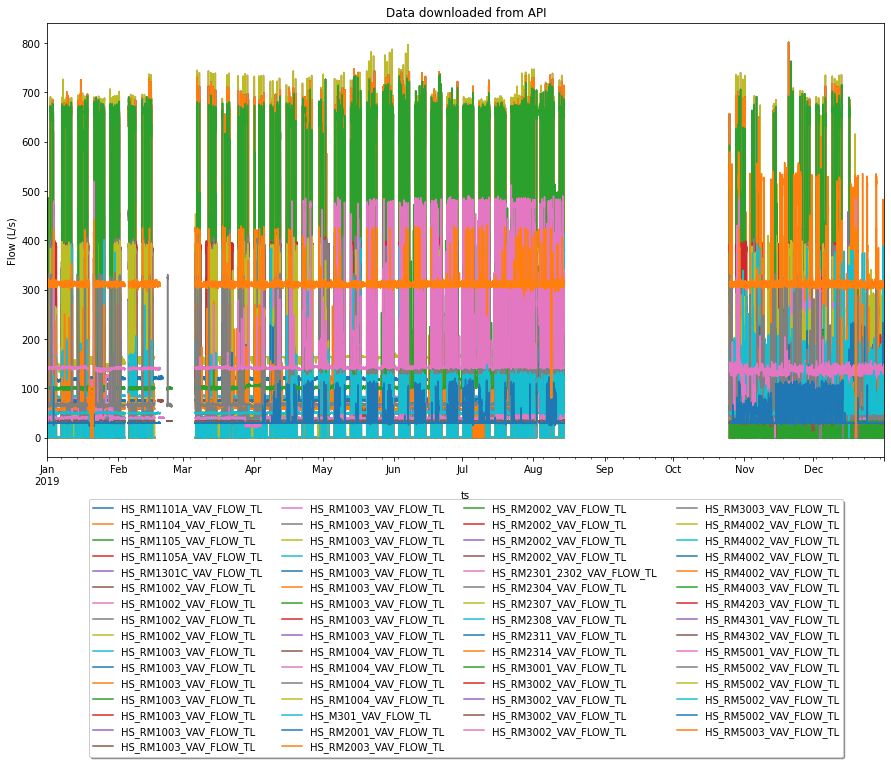

In [15]:
# Plot data retrieved from the API
ax = trend_log_data.plot(figsize=(15,8), title='Data downloaded from API', ylabel='Flow (L/s)')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=4, fancybox=True, shadow=True);

#### Ideas for future implementation:
 - Incorporate "Notify_Type" Parameter to differentiate handing of event based and time step based recordings
 - Use units to classify sensors

### Workflow 2
Use api to access systems and subordinates using tags.

In [17]:
# Example inputs
building_number = 3951 # Building
search_term = 'Mixed Air Temperature' # system search term

In [18]:
# Initial API query gets system count
url = 'https://kaizen.coppertreeanalytics.com/yana/mongo/systems/?building={}&page_size=1'.format(
    building_number
)
r = requests.get(url, headers=jwt_header)
count = r.json()['meta']['pagination']['count']

# Second API query gets full systems list
url = 'https://kaizen.coppertreeanalytics.com/yana/mongo/systems/?building={}&page_size={}'.format(
    building_number, count
)
r = requests.get(url, headers=jwt_header)

# Convert to dataframe
df = pd.json_normalize(r.json()['results'])
df

,Description,Node_Type,Object_Identifier,Object_Name,Object_Type,Subordinate_Annotations,Subordinate_List,Subordinate_Tags,Tags,_id,d,i,l,t,ts,v
0,Model:,Unknown,SV1000,NAE-24/N2-1.24AVV045,SV,"[NAE-24/N2-1.24AVV045.RM-T.Trend1, NAE-24/N2-1...","[505.TL3002610, 505.TL3002611, 505.TL3002612, ...","[Room Temperature, Discharge Air Flow CFM, Dis...","[Zone, Variable Air Volume]",3951.0.SV1000,0,1000,3951,SV,2020-06-24T15:45:57.773000,574
1,Model:,Unknown,SV1001,NAE-24/N2-1.24AVV046,SV,"[NAE-24/N2-1.24AVV046.RM-T.Trend1, NAE-24/N2-1...","[505.TL3002615, 505.TL3002616, 505.TL3002617, ...","[Room Temperature, Discharge Air Flow CFM, Dis...","[Zone, Variable Air Volume]",3951.0.SV1001,0,1001,3951,SV,2020-06-24T15:45:57.775000,574
2,Model:,Unknown,SV1002,NAE-24/N2-1.24AVV047,SV,"[NAE-24/N2-1.24AVV047.RM-T.Trend1, NAE-24/N2-1...","[505.TL3002620, 505.TL3002621, 505.TL3002622, ...","[Room Temperature, Discharge Air Flow CFM, Dis...","[Zone, Variable Air Volume]",3951.0.SV1002,0,1002,3951,SV,2020-06-24T15:45:57.777000,574
3,Model:,Unknown,SV1003,NAE-24/N2-1.24AVV048,SV,"[NAE-24/N2-1.24AVV048.RM-T.Trend1, NAE-24/N2-1...","[505.TL3002624, 505.TL3002625, 505.TL3002626, ...","[Room Temperature, Discharge Air Flow CFM, Dis...","[Zone, Variable Air Volume]",3951.0.SV1003,0,1003,3951,SV,2020-06-24T15:45:57.779000,574
4,Model:,Unknown,SV1004,NAE-24/N2-1.24AVV049,SV,"[NAE-24/N2-1.24AVV049.RM-T.Trend1, NAE-24/N2-1...","[505.TL3002629, 505.TL3002630, 505.TL3002631, ...","[Room Temperature, Discharge Air Flow CFM, Dis...","[Zone, Variable Air Volume]",3951.0.SV1004,0,1004,3951,SV,2020-06-24T15:45:57.781000,574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,Model:,Unknown,SV995,NAE-24/N2-1.24AVV040,SV,"[NAE-24/N2-1.24AVV040.RM-T.Trend1, NAE-24/N2-1...","[505.TL3002586, 505.TL3002587, 505.TL3002588, ...","[Room Temperature, Discharge Air Flow CFM, Dis...","[Zone, Variable Air Volume]",3951.0.SV995,0,995,3951,SV,2020-06-24T15:45:57.761000,574
803,Model:,Unknown,SV996,NAE-24/N2-1.24AVV041,SV,"[NAE-24/N2-1.24AVV041.RM-T.Trend1, NAE-24/N2-1...","[505.TL3002590, 505.TL3002591, 505.TL3002592, ...","[Room Temperature, Discharge Air Flow CFM, Dis...","[Zone, Variable Air Volume]",3951.0.SV996,0,996,3951,SV,2020-06-24T15:45:57.763000,574
804,Model:,Unknown,SV997,NAE-24/N2-1.24AVV042,SV,"[NAE-24/N2-1.24AVV042.RM-T.Trend1, NAE-24/N2-1...","[505.TL3002595, 505.TL3002596, 505.TL3002597, ...","[Room Temperature, Discharge Air Flow CFM, Dis...","[Zone, Variable Air Volume]",3951.0.SV997,0,997,3951,SV,2020-06-24T15:45:57.766000,574
805,Model:,Unknown,SV998,NAE-24/N2-1.24AVV043,SV,"[NAE-24/N2-1.24AVV043.RM-T.Trend1, NAE-24/N2-1...","[505.TL3002600, 505.TL3002601, 505.TL3002602, ...","[Room Temperature, Discharge Air Flow CFM, Dis...","[Zone, Variable Air Volume]",3951.0.SV998,0,998,3951,SV,2020-06-24T15:45:57.768000,574


In [19]:
# Explode subordinates 
df = pd.json_normalize(r.json()['results'])
df = df.apply(lambda x: x.explode() if x.name in ['Subordinate_Annotations', 'Subordinate_List', 'Subordinate_Tags'] else x)

# Search using subordinate_tags properties
df_filtered = df[df['Subordinate_Tags']==search_term]
df_filtered = df_filtered.drop_duplicates(subset='Subordinate_List', keep="first")
df_filtered = df_filtered[['Subordinate_List', 'Subordinate_Annotations']]
df_filtered['Subordinate_List'] = str(building_number) + '.' + df_filtered['Subordinate_List'].astype(str)
df_filtered

,Subordinate_List,Subordinate_Annotations
100,3951.506.TL3001626,NAE-25/N2-1.25ADX090.MAT.Trend1
177,3951.507.TL3001609,NAE-26/N2-1.26ADX090.MAT.Trend1
252,3951.508.TL3001575,NAE-27/N2-1.27ADX090.MAT.Trend1
254,3951.508.TL3001618,NAE-27/N2-1.27ADX190.MAT.Trend1
315,3951.512.TL3001680,NAE-28/FC-1.28AFA004.MA-T.Trend1
339,3951.513.TL3007707,NAE-29/FC-1.29AFA004.MA-T.Trend1
415,3951.514.TL3006705,NAE-30/FC-1.30AFA004.MA-T.Trend1
483,3951.502.TL3000527,NAE-21/N2-1.21ADX030.S-15 MAT.Trend1
484,3951.502.TL3000544,NAE-21/N2-1.21ADX030.S-16 MAT.Trend1
542,3951.502.TL3000807,NAE-21/N2-1.21ADX001.MAT.Trend1


In [15]:
# The download using the batch API puller
system_keyword_search = API_puller(
    trend_log_list=df_filtered,
    API_key=api_key,
    date_range=['2019-01-01', '2020-01-01'],
    resample=15
)

Organizing: 100%|█████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 197.43it/s]


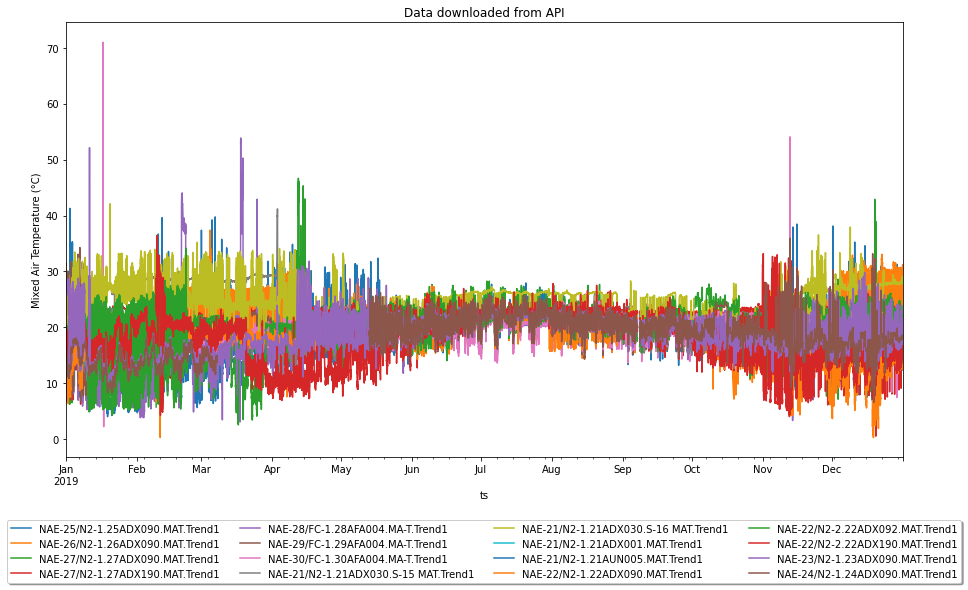

In [33]:
# Plot data retrieved from the API
ax = system_keyword_search.plot(figsize=(15,8), title='Data downloaded from API', ylabel='Mixed Air Temperature (°C)')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, fancybox=True, shadow=True);

#### Ideas for future implementation:
 - Organize API calls based on system hierarchy